<a href="https://colab.research.google.com/github/vinthegreat84/ML-Lab/blob/main/09_Random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
link = 'https://raw.githubusercontent.com/vinthegreat84/ML-Lab/main/data/rock%20type.csv'
data = pd.read_csv(link)
data.head()

,SAMPLE ID,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5,class
0,ME4,81.10,0.710,7.50,0.080,1.10,0.72,0.86,1.890,0.030,clay
1,"91-596-1.2,68-71",52.77,0.842,14.67,1.242,3.29,2.40,4.33,3.579,1.200,clay
2,17-Mar,43.73,2.060,15.90,0.170,10.03,4.57,1.39,1.520,0.160,clay
3,ME5,84.90,0.330,5.40,0.030,0.27,2.00,0.07,1.630,0.020,clay
4,V14-55,65.91,0.614,11.08,0.152,2.42,4.03,3.41,1.140,0.082,clay


In [3]:
# dropping extra variable
data.drop(['SAMPLE ID'], axis=1, inplace=True)
data.head()

,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5,class
0,81.10,0.710,7.50,0.080,1.10,0.72,0.86,1.890,0.030,clay
1,52.77,0.842,14.67,1.242,3.29,2.40,4.33,3.579,1.200,clay
2,43.73,2.060,15.90,0.170,10.03,4.57,1.39,1.520,0.160,clay
3,84.90,0.330,5.40,0.030,0.27,2.00,0.07,1.630,0.020,clay
4,65.91,0.614,11.08,0.152,2.42,4.03,3.41,1.140,0.082,clay


                precision    recall  f1-score   support

          clay       0.74      0.38      0.50        61
coarse clastic       0.80      0.93      0.86       412
           mud       0.59      0.44      0.50        85
          silt       0.67      0.58      0.62       133

      accuracy                           0.76       691
     macro avg       0.70      0.58      0.62       691
  weighted avg       0.74      0.76      0.74       691



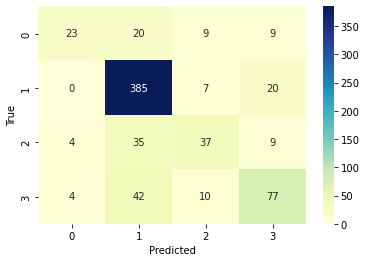

In [8]:
# Split the data into features and target
X = data[['SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5']]
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier object
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()